Chúc các bạn làm bài tốt!

# Load thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/AI4E_ML01'

/content/drive/MyDrive/AI4E_ML01


In [ ]:
!ls

linear.csv  nonLinear.csv  sample.csv


# 1: Implement lại thuật toán Linear Regression

In [ ]:
class LinearRegression():
    def __init__(self):
        super().__init__()
        self.coefficients = None
        # Để có thể làm tốt các bài sau, các bạn cần có kiến thức nền tảng về Objects Oriented Programming (OOP)
        # Mình khuyến khích bài post này:

        # Giải thích đơn giản về OOP     
        # https://www.freecodecamp.org/news/object-oriented-programming-concepts-21bb035f7260/

        # OOP trong Python         
        # https://realpython.com/python3-object-oriented-programming/
        # https://www.geeksforgeeks.org/abstract-classes-in-python/        
    
    def fit(self,X,y):
        X = np.insert(X, 0, 1, axis=1)
        # Compute the coefficients of the linear regression model
        XtX = np.dot(X.T, X)
        XtX_inv = np.linalg.inv(XtX)
        Xty = np.dot(X.T, y)
        self.coefficients = np.dot(XtX_inv, Xty)     
        
    def predict(self,X):
        X = np.insert(X, 0, 1, axis=1)
        # Make predictions using the linear regression model
        y_pred = np.dot(X, self.coefficients)        
        return y_pred 

# 2a: Fit dữ liệu trong file linear.csv và visualize

In [ ]:
data=pd.read_csv('linear.csv',sep=',')
data.columns=['area','price']   #doi ten columns
data.head()

area    price
0  30.0000  448.524
1  32.4138  509.248
2  34.8276  535.104
3  37.2414  551.432
4  39.6552  623.418

In [ ]:
re
y=data.iloc[:,-1].values

In [ ]:
reg = LinearRegression()
# Code trong cell này.
reg.fit(X,y)
y_pred=reg.predict(X)

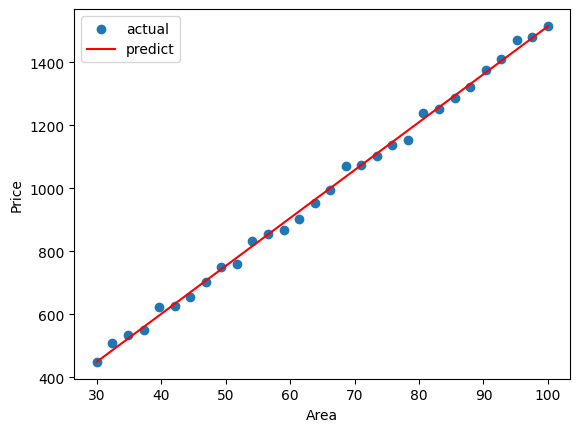

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='actual')
plt.plot(X, y_pred,'r',label = 'predict')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2b: Tính loss Root Mean Squared Error - RMSE

In [ ]:
# Code trong cell này.
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [ ]:
mean_squared_error(y, y_pred)

246.61987849112512

# 3a: Fit dữ liệu trong file nonLinear.csv 

In [ ]:
# Code trong cell này.
data=pd.read_csv('nonLinear.csv',sep=',')
data.columns=['area','price']   #doi ten columns
data.head()



area    price
0  30.0000 -100.000
1  32.4138 -190.725
2  34.8276 -269.798
3  37.2414 -337.218
4  39.6552 -392.985

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
reg.fit(X,y)
y_pred=reg.predict(X)


# 3b: Visualize kết quả

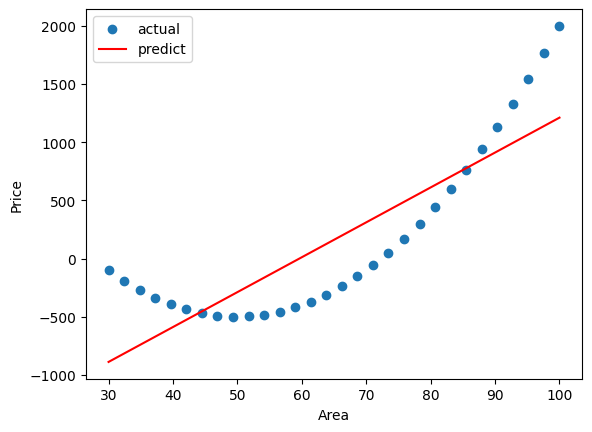

In [ ]:
# Code trong cell này.
import matplotlib.pyplot as plt
plt.scatter(X, y, label='actual')
plt.plot(X, y_pred,'r',label = 'predict')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3c: Nhận xét

Đây là cell markdown, hãy ghi nhận xét của bạn ở đây

day k phai linear regression, day la y= ax**2... ham parabol

# 4: Cải thiện model

In [ ]:
# Code trong cell này.
data_new=np.array(data.area,data.area**2)
data_new
X0=np.array(data.area**2)
X00=np.array(data.area)
y0=np.array(data.price)
X1=X0.reshape(-1,1)
X2=X00.reshape(-1,1)
X=np.concatenate((X1,X2), axis=1)
y=y0.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
y_pred=reg.predict(X)

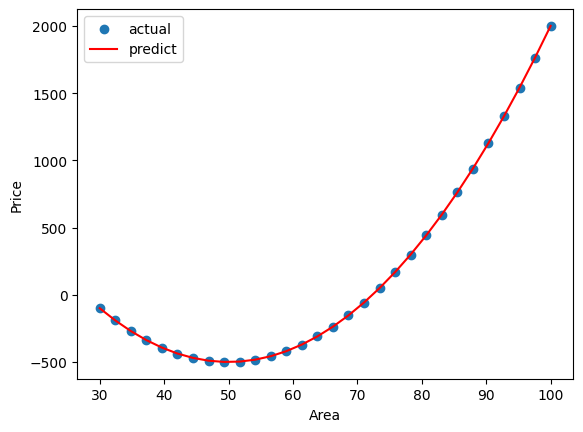

In [ ]:
plt.scatter(data.area, data.price,label='actual')
plt.plot(data.area, y_pred,'r',label='predict')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# 5: Thử nghiệm với dữ liệu sample.csv

In [ ]:
# Code trong cell này.
data=pd.read_csv('sample.csv',sep=',')
data.head(10)

Unnamed: 0  %Fat  Femoral Neck         Kg  Activity    %Fat S       pound
0           0  25.3         0.934  52.163126   3508.44 -3.265217  115.918058
1           1  29.3         0.888  61.801964   2773.54  0.734783  137.337699
2           2  37.7         0.933  93.440034   1738.97  9.134783  207.644521
3           3  32.8         0.757  59.874197   1665.29  4.234783  133.053771
4           4  24.6         1.031  50.348756   3982.95 -3.965217  111.886125
5           5  26.5         0.883  57.606235   2985.74 -2.065217  128.013855
6           6  21.2         0.837  51.709534   3002.38 -7.365217  114.910075
7           7  28.4         0.912  54.884680   3232.98 -0.165217  121.965956
8           8  24.0         0.853  53.977496   2823.68 -4.565217  119.949990
9           9  28.7         0.825  53.523903   2414.12  0.134783  118.942007

In [ ]:
df= data[['pound', 'Femoral Neck', 'Activity', '%Fat S', 'Kg']]
X = df[['pound', 'Femoral Neck', 'Activity', '%Fat S']].values
y = df['Kg'].values.reshape(-1, 1)

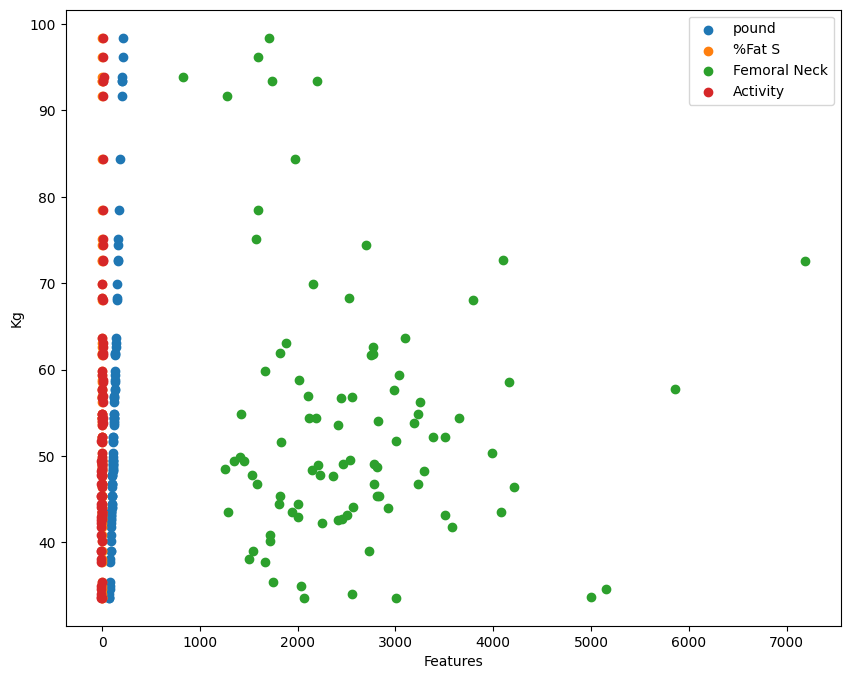

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], y, label='pound')
ax.scatter(X[:, 1], y, label='%Fat S')
ax.scatter(X[:, 2], y, label='Femoral Neck')
ax.scatter(X[:, 3], y, label='Activity')
ax.set_xlabel('Features')
ax.set_ylabel('Kg')
ax.legend()
plt.show()


In [ ]:
reg = LinearRegression()
reg.fit(X, y)
y_pred=reg.predict(X)